In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statistics
import pandas as pd
from pandas import DataFrame
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from math import pi
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.stats as ss
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv('heart.csv')
df.head()
df.fillna(0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
df['Sex'].replace( { 'M':1, 'F':0} , inplace=True)
df['ChestPainType'].replace( { 'ATA':1, 'NAP':2, 'ASY':3, 'TA':4} , inplace=True)
df['FastingBS'].replace( { 0 : 0, 1 : 1} , inplace=True)
df['RestingECG'].replace( { 'Normal':0, 'ST':1, 'LVH':2} , inplace=True)
df['ExerciseAngina'].replace( { 'N':0, 'Y':1} , inplace=True)
df['ST_Slope'].replace( { 'Up':0, 'Flat':1, 'Down':2} , inplace=True)
df['HeartDisease'].replace( { 1 : 1, 0 : 0} , inplace=True)

In [17]:
#normalizing continuous features


continuous_features  = ['Age', 'ChestPainType','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['Sex ', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope ']

df[continuous_features] = df[continuous_features].apply(lambda x1: (x1 - np.min(x1))/(np.max(x1)-np.min(x1)))
df
        

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,0.000000,0.70,0.479270,0,0,0.788732,0,0.295455,0,0
1,0.428571,0,0.333333,0.80,0.298507,0,0,0.676056,0,0.409091,1,1
2,0.183673,1,0.000000,0.65,0.469320,0,1,0.267606,0,0.295455,0,0
3,0.408163,0,0.666667,0.69,0.354892,0,0,0.338028,1,0.465909,1,1
4,0.530612,1,0.333333,0.75,0.323383,0,0,0.436620,0,0.295455,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,1.000000,0.55,0.437811,0,0,0.507042,0,0.431818,1,1
914,0.816327,1,0.666667,0.72,0.320066,1,0,0.570423,0,0.681818,1,1
915,0.591837,1,0.666667,0.65,0.217247,0,0,0.387324,1,0.431818,1,1
916,0.591837,0,0.000000,0.65,0.391376,0,2,0.802817,0,0.295455,1,1


In [18]:
train=df.sample(frac=0.8,random_state=200) 
test=df.drop(train.index)


In [19]:
df_failure_yes=train.loc[train['HeartDisease'] == 1]
df_failure_no=train.loc[train['HeartDisease'] == 0]
df_failure_yes

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
276,0.469388,1,0.333333,0.675,0.265340,0,0,0.633803,0,0.522727,1,1
350,0.510204,1,0.666667,0.600,0.000000,1,0,0.422535,0,0.295455,1,1
697,0.612245,1,0.666667,0.750,0.447761,0,2,0.359155,1,0.386364,0,1
141,0.448980,1,0.666667,0.700,0.565506,0,1,0.457746,1,0.579545,1,1
379,0.448980,1,0.666667,0.600,0.000000,0,1,0.676056,1,0.295455,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.714286,1,0.666667,0.750,0.000000,0,0,0.183099,1,0.522727,1,1
308,0.612245,1,0.666667,0.575,0.000000,1,0,0.549296,0,0.352273,0,1
414,0.530612,1,0.666667,0.650,0.000000,1,0,0.352113,1,0.636364,1,1
814,1.000000,1,0.666667,0.625,0.504146,0,2,0.718310,1,0.295455,0,1


In [20]:
y_counts=train['HeartDisease'].value_counts()
p_y=y_counts/len(train)


# Conditional probabilities_categorial
#for faulure=yes
sex_yes_count=df_failure_yes['Sex'].value_counts()  

p_sex_yes=sex_yes_count/len(df_failure_yes)

fasting_yes_count=df_failure_yes['FastingBS'].value_counts()  
p_fasting_yes=fasting_yes_count/len(df_failure_yes)

restingecg_yes_count=df_failure_yes['RestingECG'].value_counts()  
p_restingecg_yes=restingecg_yes_count/len(df_failure_yes)

exercise_yes_count=df_failure_yes['ExerciseAngina'].value_counts()  
p_exercise_yes=exercise_yes_count/len(df_failure_yes)

st_yes_count=df_failure_yes['ST_Slope'].value_counts()  
p_st_yes=st_yes_count/len(df_failure_yes)


#mean and variance for continuous variables when failure=yes

age_mean_yes=df_failure_yes['Age'].mean()
age_var_yes=df_failure_yes['Age'].var()


chest_mean_yes=df_failure_yes['ChestPainType'].mean()
chest_var_yes=df_failure_yes['ChestPainType'].var()


restingbp_mean_yes=df_failure_yes['RestingBP'].mean()
restingbp_var_yes=df_failure_yes['RestingBP'].var()


chol_mean_yes=df_failure_yes['Cholesterol'].mean()
chol_var_yes=df_failure_yes['Cholesterol'].var()


max_mean_yes=df_failure_yes['MaxHR'].mean()
max_var_yes=df_failure_yes['MaxHR'].var()


old_mean_yes=df_failure_yes['Oldpeak'].mean()
old_var_yes=df_failure_yes['Oldpeak'].var()


    

In [21]:
#Class condional probability for categorical when failure=no

sex_no_count=df_failure_no['Sex'].value_counts()  
p_sex_no=sex_no_count/len(df_failure_no)

fasting_no_count=df_failure_no['FastingBS'].value_counts()  
p_fasting_no=fasting_no_count/len(df_failure_no)

restingecg_no_count=df_failure_no['RestingECG'].value_counts()  
p_restingecg_no=restingecg_no_count/len(df_failure_no)

exercise_no_count=df_failure_no['ExerciseAngina'].value_counts()  
p_exercise_no=exercise_no_count/len(df_failure_no)

st_no_count=df_failure_no['ST_Slope'].value_counts()  
p_st_no=st_no_count/len(df_failure_no)


#mean and variance for continuous variables when failure=yes

age_mean_no=df_failure_no['Age'].mean()
age_var_no=df_failure_no['Age'].var()


chest_mean_no=df_failure_no['ChestPainType'].mean()
chest_var_no=df_failure_no['ChestPainType'].var()


restingbp_mean_no=df_failure_no['RestingBP'].mean()
restingbp_var_no=df_failure_no['RestingBP'].var()


chol_mean_no=df_failure_no['Cholesterol'].mean()
chol_var_no=df_failure_no['Cholesterol'].var()


max_mean_no=df_failure_no['MaxHR'].mean()
max_var_no=df_failure_no['MaxHR'].var()


old_mean_no=df_failure_no['Oldpeak'].mean()
old_var_no=df_failure_no['Oldpeak'].var()


In [22]:
def class_condition_cotinuous(values,mean,variance):
 
        first_equation = 1/(np.sqrt(2 * pi * variance))
        denominator = 2 * variance
        numerator = (values - mean) ** 2
        exponent = np.exp(-(numerator/denominator))
        prob_calc = first_equation * exponent
        return prob_calc

def Bayes(py, p1, p2, p3, p4, p5, p6,p7,p8,p9,p10,p11):
    
    p=py*p1*p2*p3*p4*p5*p6*p7*p8*p9*p10*p11
    return p

In [23]:
#precision,recall,f1score
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, TN, FP, FN)

def precision_fn(tp, fp):
   
    return (tp  * 100)/ float( tp + fp)

def recall_fn(tp, fn):
    
    return (tp  * 100)/ float( tp + fn)

def f1_score_fn(precision, recall):
    # calculates the F1 score
    f1_score = (2*precision*recall)/ (precision + recall)
 
    return f1_score

def plot_confusion_matrix(cm):
    fx = sebrn.heatmap(cm, annot=True, cmap='turbo')
    fx.set_title(' Confusion Matrix \n\n');
    fx.set_xlabel('\nValues model predicted')
    fx.set_ylabel('True Values ');

In [24]:
#Test

result_array=[]

for i in range(0,184):
    feature_age=test.iloc[i]['Age']
    feature_sex=test.iloc[i]['Sex']
    feature_chest=test.iloc[i]['ChestPainType']
    feature_restingbp=test.iloc[i]['RestingBP']
    feature_chol=test.iloc[i]['Cholesterol']
    feature_fasting=test.iloc[i]['FastingBS']
    feature_ecg=test.iloc[i]['RestingECG']
    feature_max=test.iloc[i]['MaxHR']
    feature_exercise=test.iloc[i]['ExerciseAngina']
    feature_old=test.iloc[i]['Oldpeak']
    feature_st=test.iloc[i]['ST_Slope']
    
    p_age=class_condition_cotinuous(feature_age,age_mean_yes,age_var_yes)
    p_chest=class_condition_cotinuous(feature_age,chest_mean_yes,chest_var_yes)
    p_restingbp=class_condition_cotinuous(feature_restingbp,restingbp_mean_yes,restingbp_var_yes)
    p_chol=class_condition_cotinuous(feature_chol,chol_mean_yes,chol_var_yes)    
    p_max= class_condition_cotinuous(feature_max,max_mean_yes,max_var_yes)
    p_old=class_condition_cotinuous(feature_old,old_mean_yes,old_var_yes)
    
    
    p_ageno=class_condition_cotinuous(feature_age,age_mean_no,age_var_no)
    p_chestno=class_condition_cotinuous(feature_age,chest_mean_no,chest_var_no)
    p_restingbpno=class_condition_cotinuous(feature_restingbp,restingbp_mean_no,restingbp_var_no)
    p_cholno=class_condition_cotinuous(feature_chol,chol_mean_no,chol_var_no)    
    p_maxno= class_condition_cotinuous(feature_max,max_mean_no,max_var_no)
    p_oldno=class_condition_cotinuous(feature_old,old_mean_no,old_var_no)
    
 
    P_Y1=Bayes(p_y[1], p_age,p_sex_yes[feature_sex],p_chest, p_restingbp, p_chol,p_fasting_yes[feature_fasting],p_restingecg_yes[ feature_ecg],p_max,p_exercise_yes[feature_exercise],p_old,p_st_yes[ feature_st])
   
    P_Y0=Bayes(p_y[0], p_ageno,p_sex_no[feature_sex],p_chestno, p_restingbpno, p_cholno,p_fasting_no[feature_fasting],p_restingecg_no[ feature_ecg],p_maxno,p_exercise_no[feature_exercise],p_oldno,p_st_no[ feature_st])
    if P_Y0 > P_Y1:
        result=0
    else:
        result=1
        
    result_array.append(result)
 



  

Accuracy  86.41304347826086
precision 88.57142857142857
recall 87.73584905660377
f1_score 88.1516587677725
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        78
           1       0.89      0.88      0.88       106

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



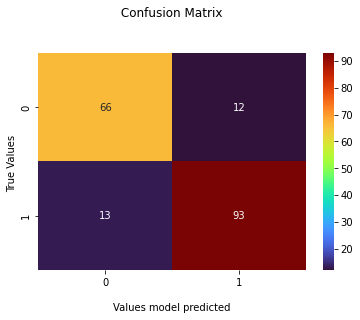

In [25]:

import seaborn as sebrn


array=test['HeartDisease'].to_numpy()
tp, tn, fp, fn= perf_measure(array,result_array)

precision=precision_fn(tp, fp)
recall= recall_fn(tp, fn)
f1_score=f1_score_fn(precision,recall)
conf_matrix = confusion_matrix(array,result_array)

score = np.sum(array == result_array) / len(array)
print("Accuracy ",score*100)

print("precision",precision)
print("recall",recall)
print("f1_score",f1_score)
print(classification_report(array,result_array))
plot_confusion_matrix(conf_matrix)
